# Heart failure prediction

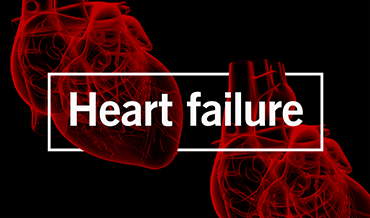

## hello kagglers , this is my 3rd notebook in kaggle, in this notebook i'm gonna model a classifier for the heart failure prediction using the heart failure clinical data with a classification method

### first, importing some libraries which are required in this notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### next, reading the clinical csv data file using pandas

In [ ]:
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

## most of the columns data are represented as 0 and 1
## columns ----------->                  0       /          1

##             DEATH_EVENT  ->  alive         /      dead
##             anaemia    ->    non-anaemic    /     anaemic
##             diabetes   ->    non-diabetic    /    diabetic
##     high_blood_pressure ->  normal blood presure/ high blood pressure
##             sex      ->      female       /       male
##             smoking   ->     non-smoker    /      smoker

In [ ]:
df.columns

In [ ]:
df.shape

### checking whether there is any missing values in the provided csv file

In [ ]:
missing_data = df.isnull()

### printing out each columns count of missing and present value
### if missing value - True 
### and present  value -False

In [ ]:
for column in df:
    print(column)
    print(missing_data[column].value_counts())
    print('')

### good to say that this dataset has no missing values

### to see the relation between categorical values and DEATH_EVENT, using boxplots from seaborn to visualize them

In [ ]:
plt.style.use('ggplot')
Y = df[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
        'serum_creatinine','age', 'serum_sodium']]
for col in Y:
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)
    plt.title( 'Death caused by ' + col)
    plt.show()

### from the above boxplots serum sodium, age, platelets,  serum creatinine and ejection fraction are  good classifiers of Death Event

## Ejection fraction - Ejection fraction is a measurement of the percentage of blood leaving your heart each time it contracts. 


### A normal LVEF reading for adults over 20 years of age is 53 to 73 percent. An LVEF of below 53 percent for women and 52 percent for men is considered low. An RVEF of less than 45 percent is considered a potential indicator of heart issues.

## serum sodium - the amount of sodium in your blood

#### The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L).

## serum creatinine - the level of creatinine in your blood. creatinine( waste released by muscles)

####  increased creatinine levels during hospitalization are a marker of poor cardiac output, leading to diminished renal blood flow and reduced ability to tolerate inpatient heart failure treatment

## Platelets -Platelets are tiny blood cells that help your body form clots to stop bleeding

#### Thrombocytosis is a condition in which there is an excessive number of platelets in the blood. Too many platelets can lead to certain conditions, including stroke, heart attack, or a clot in the blood vessels.

#### The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L

In [ ]:
x = ['male', 'female']
y = df['sex'].value_counts()
plt.style.use('fivethirtyeight')
plt.bar(x, y, color='r')
plt.title('Death Rate Comparison Between sex')
plt.show()


#### The rate of death in male is far higher than that  of female

In [ ]:
x =['non-smokers', 'smokers']
y = df['smoking'][(df['DEATH_EVENT']==1)].value_counts()
plt.bar(x, y, color='b')
plt.title('death count between smokers and non smokers')
plt.show()

### there is double the death in non-smokers than compared to smokers

> ### importing Decision tree classifier as we are going to use Decision Tree Classifier as our model
> ### imorting train_test_split to train and test with the given data itself which will perform well when tested outside the give dataset


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('DEATH_EVENT', axis=1)
X = x.values
y = df['DEATH_EVENT'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn import metrics

In [ ]:
for i in range(4, 10):
    death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    death_tree.fit(x_train, y_train)
    pred_death = death_tree.predict(x_test)
    print('with max_depth of {} , death_tree accuracy is {}'.format (i, metrics.accuracy_score(y_test, pred_death)))

## the above output shows the best accuracy of the model with different depth and the model provides a maximum accuracy of 0.9 which approves the model.

In [ ]:
death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
death_tree.fit(x_train, y_train)
pred_death = death_tree.predict(x_test)
print('with max_depth of {} , death_tree accuracy is {}'.format (6, metrics.accuracy_score(y_test, pred_death)))

In [ ]:
from sklearn import tree
import graphviz

## the visualization of the decision tree classifier model is shown below

In [ ]:
plt.figure(figsize=(200, 200))
filename ='death_tree.png'

featureNames = df.columns[:-1]
targetNames = ['death', 'alive']

dot_data = tree.export_graphviz(death_tree, feature_names=featureNames, class_names=targetNames,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### upvoting is a way of appreciation
### do upvote if you like this notebook